Yiting Wang 4646909520

(a)

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [1]:
import numpy as np, pandas as pd 
train_data = pd.read_csv('../Data/aps_failure_train_set.csv', skiprows = 20)
test_data = pd.read_csv('../Data/aps_failure_test_set.csv', skiprows = 20)

#Convert string "na" into nan
train_data = train_data.replace('na', np.nan, regex = True)
test_data = test_data.replace('na', np.nan, regex = True)

#Convert the blank'' into nan
train_data = train_data.replace(' ', np.nan, regex = True)
test_data = test_data.replace(' ', np.nan, regex = True)

b(i)

There are 6 diffferent ways to deal with missing values.
1.Do Nothing
2.Imputation Using Mean/Median Values
3.Imputation Using Most Frequent or Zero/Constant Values
4.Imputation Using k-NN
5.Imputation Using Multivariate Imputation by Chained Equation (MICE)
6.Imputation Using Deep Learning (Datawig)

I select the second method in that problem.

In [2]:
#Construct X_train, y_train, X_test, y_test
X_train = train_data.drop(columns = ['class']).astype(float)
y_train = train_data['class']
X_test = test_data.drop(columns = ['class']).astype(float)
y_test = test_data['class']

train_mean = X_train.mean()                               # Find the mean of columns
X_train = X_train.fillna(train_mean)                      # Fill NAN with mean

test_mean = X_test.mean()                                 # Find the mean of columns
X_test = X_test.fillna(test_mean)                         # Fill NAN with mean

#Combine the data set
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

(ii)

In [67]:
#Construct CV
CV = pd.DataFrame(np.zeros((1,170)))
CV.index = ['index']
CV.columns = X.columns

for col in X.columns:
    s = np.std(X[col])                #s is sample standard deviation
    m = np.mean(X[col])               #m is sample mean
    CV[col] = s/m                     #CV = s/m

CV = CV.sort_values(by = 'index', axis = 1, ascending = False)             #Sort CV from high to low
print(CV)

           cf_000      co_000      ad_000      cs_009      dj_000     as_000  \
index  207.334566  206.940188  206.785449  192.496928  122.169191  113.89515   

           dh_000      df_000     ag_000    au_000  ...    ca_000    bl_000  \
index  112.665847  111.278526  91.464919  86.08978  ...  0.901153  0.732358   

        bk_000    bm_000    bn_000    bo_000   bp_000    bq_000    br_000  \
index  0.73016  0.594275  0.517625  0.462956  0.42698  0.400368  0.384002   

       cd_000  
index     0.0  

[1 rows x 170 columns]


(iii)

In [4]:
#Plot the correlation matrix
correlation_matrix = X.corr()
correlation_matrix.style.background_gradient(cmap='coolwarm')

D:\Python\lib\site-packages\pandas\io\formats\style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
D:\Python\lib\site-packages\pandas\io\formats\style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


(iv)

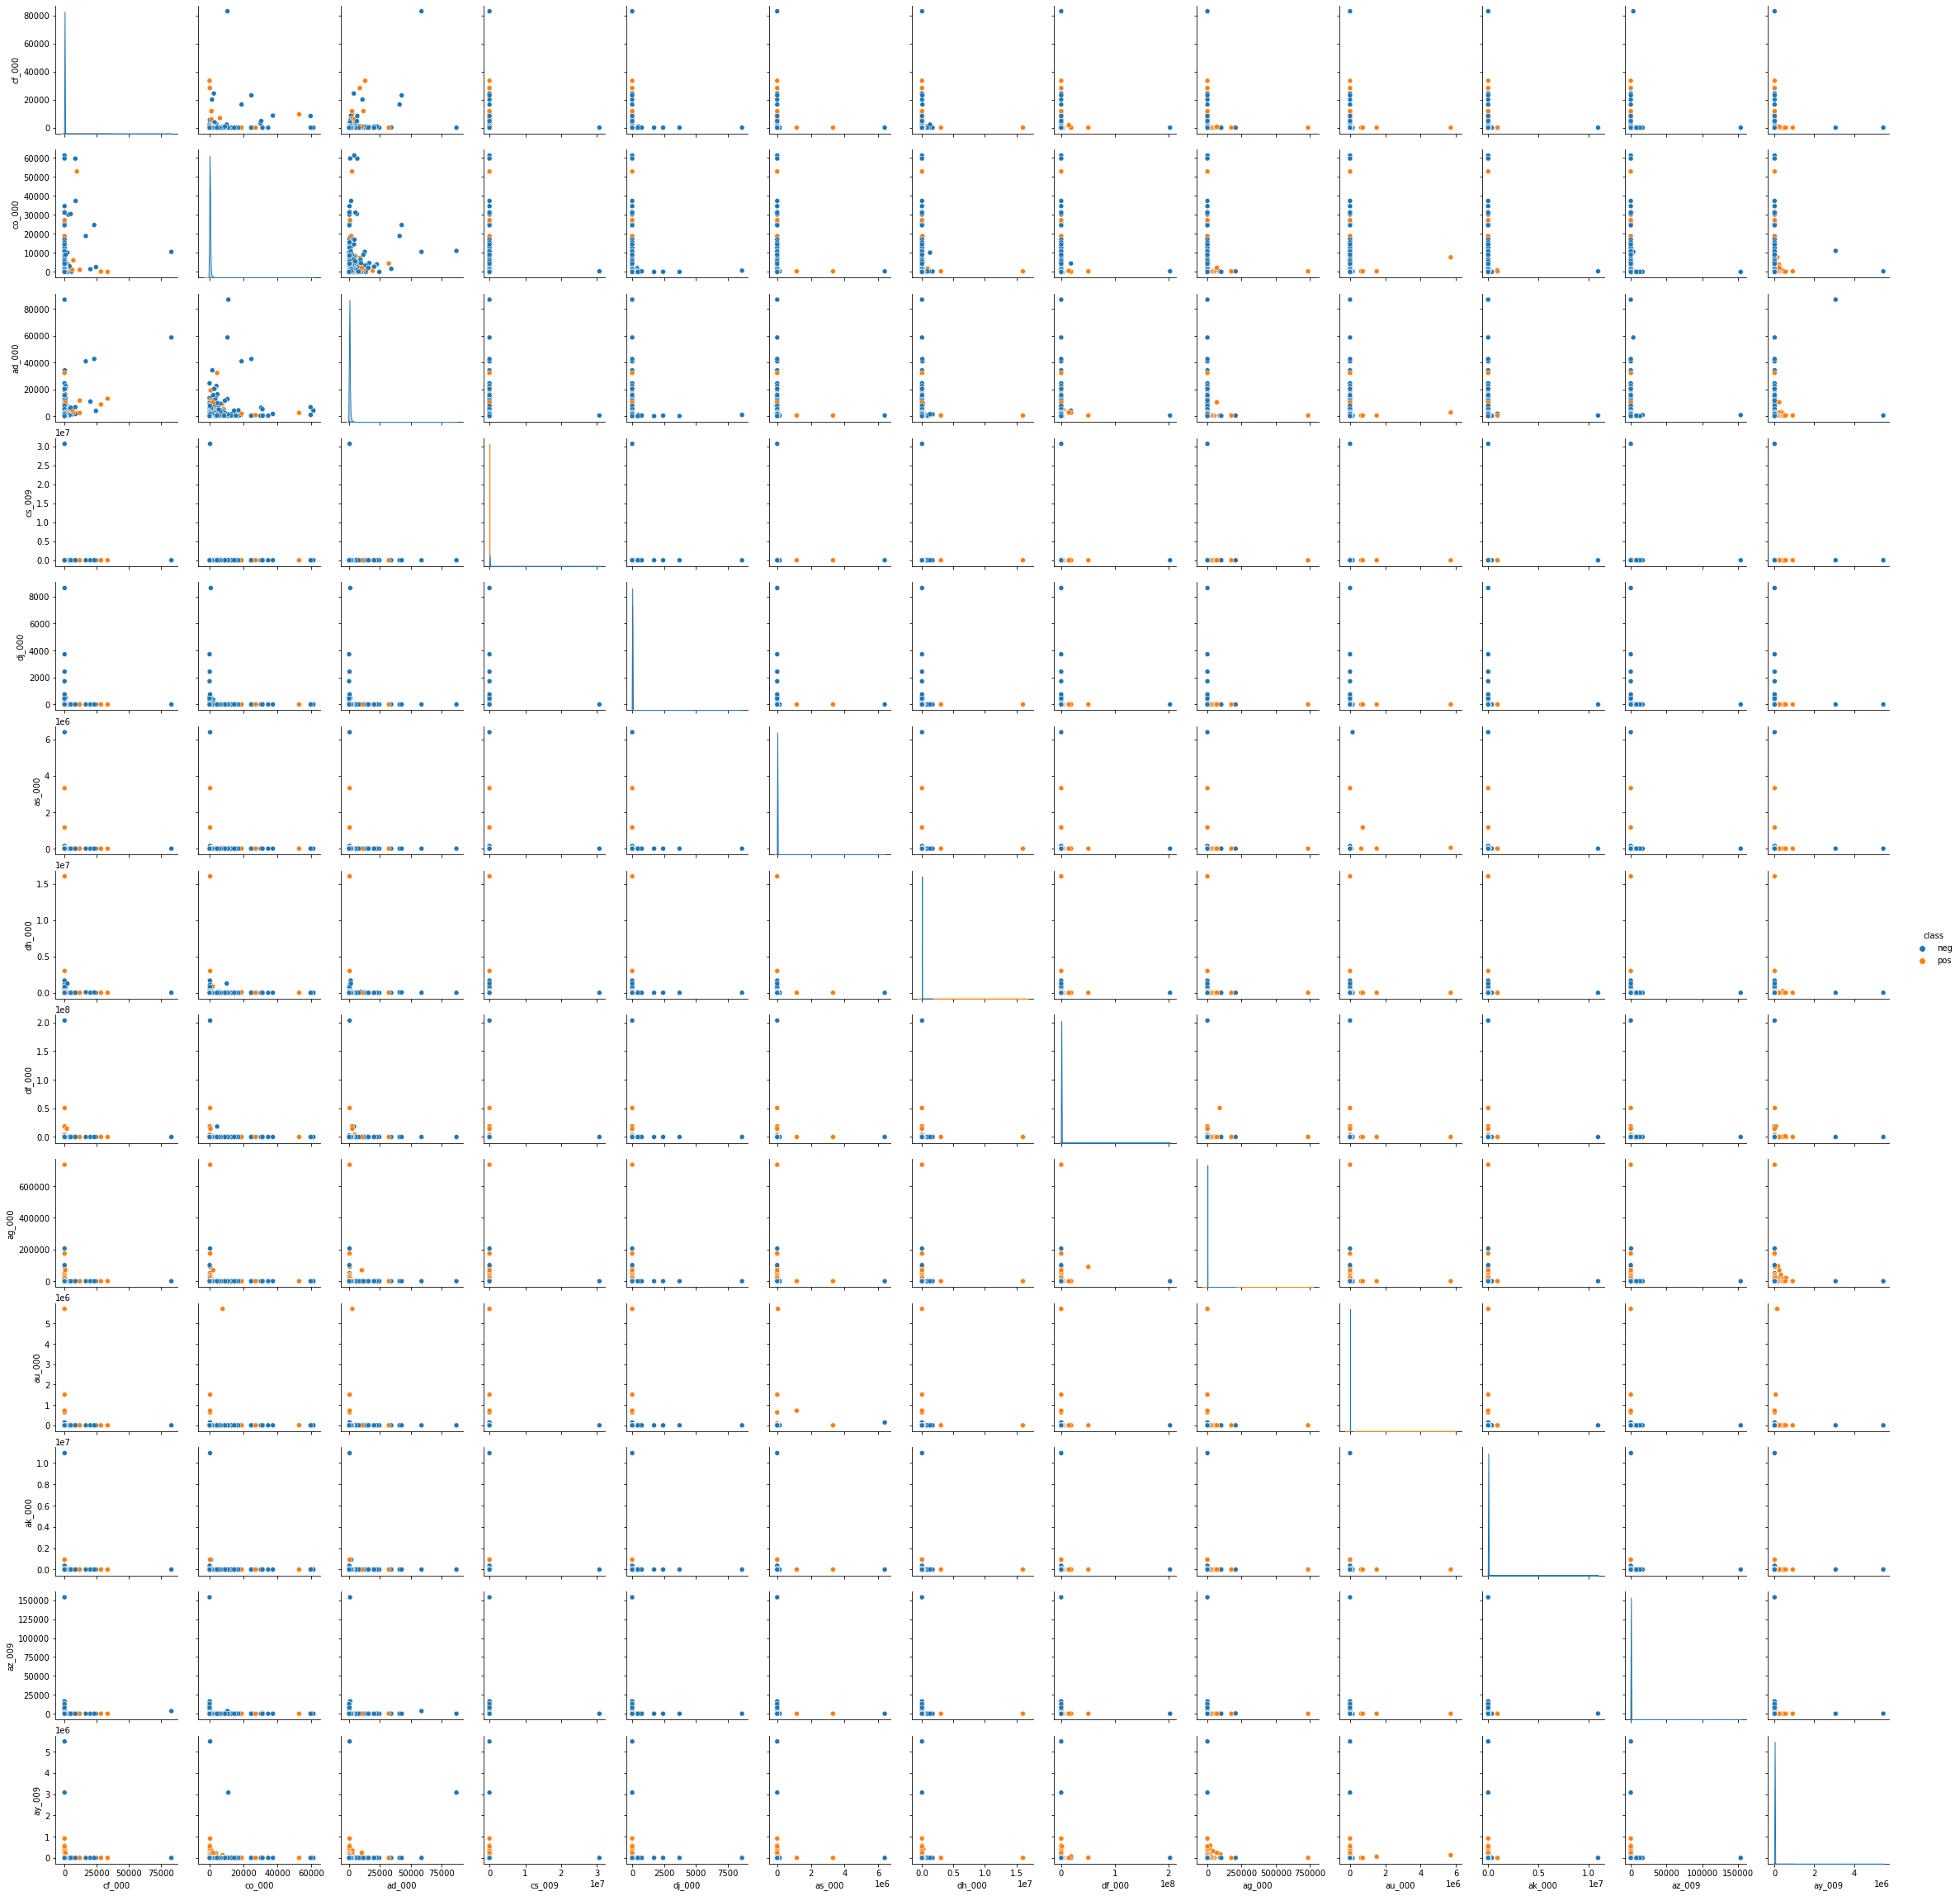

cf_000         AxesSubplot(0.1,0.736957;0.173913x0.163043)
co_000    AxesSubplot(0.308696,0.736957;0.173913x0.163043)
ad_000    AxesSubplot(0.517391,0.736957;0.173913x0.163043)
cs_009    AxesSubplot(0.726087,0.736957;0.173913x0.163043)
dj_000         AxesSubplot(0.1,0.541304;0.173913x0.163043)
as_000    AxesSubplot(0.308696,0.541304;0.173913x0.163043)
dh_000    AxesSubplot(0.517391,0.541304;0.173913x0.163043)
df_000    AxesSubplot(0.726087,0.541304;0.173913x0.163043)
ag_000         AxesSubplot(0.1,0.345652;0.173913x0.163043)
au_000    AxesSubplot(0.308696,0.345652;0.173913x0.163043)
ak_000    AxesSubplot(0.517391,0.345652;0.173913x0.163043)
az_009    AxesSubplot(0.726087,0.345652;0.173913x0.163043)
ay_009             AxesSubplot(0.1,0.15;0.173913x0.163043)
dtype: object

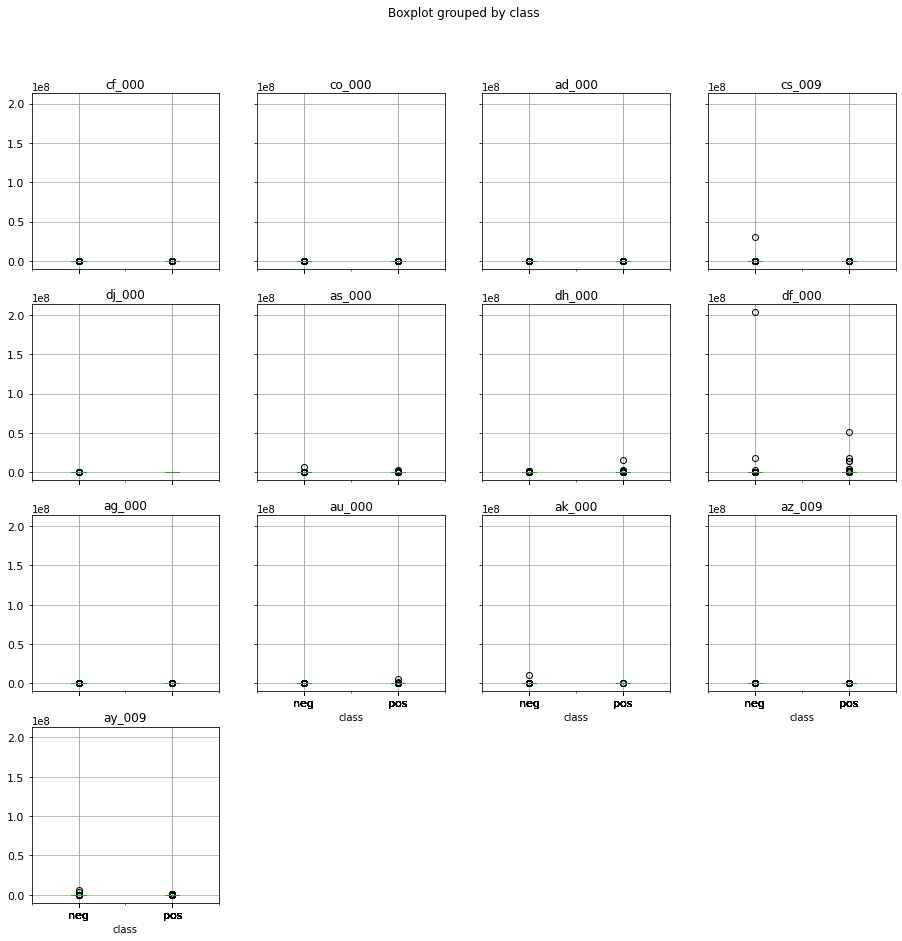

In [69]:
import math
CV_feature = CV.iloc[:, :math.floor(math.sqrt(170))].columns           #Pick sprt(128) features with highest CV
x_plot = X_test[CV_feature]                                            
data_plot = pd.concat([x_plot, y_test], axis = 1)                      #Construct the data for plotting

#Scatter plots
import seaborn as sb
import matplotlib.pyplot as plt
sb.pairplot(data_plot, hue='class')
plt.show()

#Box plots
data_plot.boxplot(column = list(x_plot.columns), by='class', fontsize = 11, figsize=(15, 15), return_type='axes')

(v)

In [70]:
#Define a function to calculate the number of positive and negative data
def test_imbalance(y):
    pos = neg = 0
    
    for i in y:
        if i == 'pos':
            pos = pos + 1      #positive number
        else:
            neg = neg + 1      #negative number
    return pos, neg

pos_train, neg_train = test_imbalance(y_train) 
pos_test, neg_test = test_imbalance(y_test)

print('Train Data:')
print('The number of positive data:', pos_train)
print('The number of negative data:', neg_train)

print('\n')
print('Test Data:')
print('The number of positive data:', pos_test)
print('The number of negative data:', neg_test)

Train Data:
The number of positive data: 1000
The number of negative data: 59000


Test Data:
The number of positive data: 375
The number of negative data: 15625


According to the number of positive and negative data, the data is imbalanced.

(c)

In [23]:
#Define a function to turn string to number
def string_to_num(y):
    y_num = []
    
    for i in y:
        if i == 'pos':
            y_num.append(1)        #pos:1
        else:
            y_num.append(0)        #neg:0
            
    y_num = pd.DataFrame(y_num)
    return y_num

new_y_train = string_to_num(y_train)    #Turn y_train into number
new_y_test = string_to_num(y_test)      #Turn y_test into number

<ipython-input-9-e21862d18277>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest = RandomForestClassifier(max_depth=2, oob_score = True).fit(X_train, new_y_train)


Confusion Matrix of Train Data:
[[58980    20]
 [  836   164]]


Accuracy of Train Data: 0.9857


Misclassification of Train Data 0.0143




No handles with labels found to put in legend.


AUC of Train Data: 0.9713




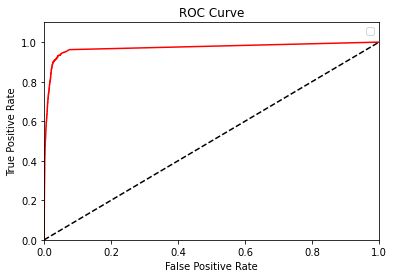

Out of Bag error of Train Data: 0.0145




In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, confusion_matrix, roc_auc_score

random_forest = RandomForestClassifier(max_depth = 2, oob_score = True).fit(X_train, new_y_train)
y_pred = random_forest.predict(X_train)             # predictions on training data

#Confusion Matrix
tn, fp, fn, tp = confusion_matrix(new_y_train, y_pred).ravel()
print('Confusion Matrix of Train Data:')
print(confusion_matrix(new_y_train, y_pred))
print('\n')

#Accuracy and Misclassification
train_Accuracy = random_forest.score(X_train, new_y_train)
train_Accuracy = round(train_Accuracy, 4)
Misclassification = round(1 - train_Accuracy, 4)
print('Accuracy of Train Data:', train_Accuracy)
print('\n')
print('Misclassification of Train Data', Misclassification)
print('\n')

#AUC value
predict_proba = random_forest.predict_proba(X_train)[::,1]
fpr, tpr, _ = roc_curve(new_y_train, predict_proba)
train_AUC = roc_auc_score(new_y_train, predict_proba)
train_AUC = round(train_AUC, 4)
print('AUC of Train Data:', train_AUC)
print('\n')

#ROC Curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.legend()
plt.show()

#Out of Bag error
oob_error = round(1 - random_forest.oob_score_, 4)
print('Out of Bag error of Train Data:', oob_error)
print('\n')

No handles with labels found to put in legend.


Confusion Matrix of Test Data:
[[15624     1]
 [  308    67]]


Accuracy of Test Data: 0.9807


Misclassification of Test Data 0.0143


AUC of Test Data: 0.9801




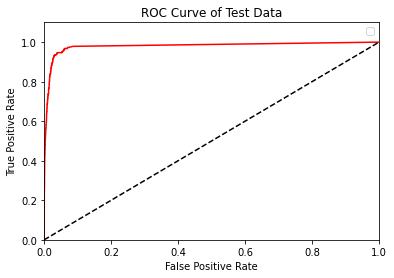

Out of Bag error of Test Data 0.0145




In [11]:
y_pred = random_forest.predict(X_test)             # predictions on training data

#Confusion Matrix
tn, fp, fn, tp = confusion_matrix(new_y_test, y_pred).ravel()
print('Confusion Matrix of Test Data:')
print(confusion_matrix(new_y_test, y_pred))
print('\n')

#Accuracy and Misclassification
test_Accuracy = random_forest.score(X_test, new_y_test)
test_Accuracy = round(test_Accuracy, 4)
Misclassification = round(1 - train_Accuracy, 4)
print('Accuracy of Test Data:', test_Accuracy)
print('\n')
print('Misclassification of Test Data', Misclassification)
print('\n')

#AUC value
predict_proba = random_forest.predict_proba(X_test)[::,1]       
fpr, tpr, _ = roc_curve(new_y_test, predict_proba)
test_AUC = roc_auc_score(new_y_test, predict_proba)
test_AUC = round(test_AUC, 4)
print('AUC of Test Data:', test_AUC)
print('\n')

#ROC Curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Test Data')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.legend()
plt.show()

#Out of Bag error
oob_error = round(1 - random_forest.oob_score_, 4)
print('Out of Bag error of Test Data', oob_error)
print('\n')

(d)

<ipython-input-14-1d4765a2b3f2>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  balance_random_forest = RandomForestClassifier(max_depth = 3, oob_score = True, class_weight = 'balanced').fit(X_train, new_y_train)


Confusion Matrix of Balanced Train Data:
[[55777  3223]
 [   43   957]]


Accuracy of Balanced Train Data: 0.9456


Misclassification of Balanced Train Data 0.0544




No handles with labels found to put in legend.


AUC of Balanced Train Data: 0.9824




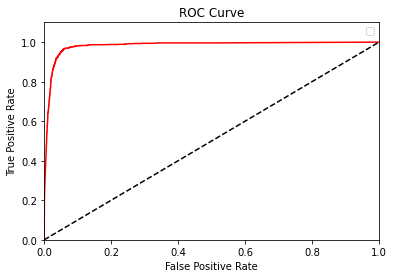

Out of Bag error of Balanced Train Data: 0.055




In [14]:
balance_random_forest = RandomForestClassifier(max_depth = 3, oob_score = True, class_weight = 'balanced').fit(X_train, new_y_train)
y_pred = balance_random_forest.predict(X_train)             # predictions on training data

#Confusion Matrix
tn, fp, fn, tp = confusion_matrix(new_y_train, y_pred).ravel()
print('Confusion Matrix of Balanced Train Data:')
print(confusion_matrix(new_y_train, y_pred))
print('\n')

#Accuracy and Misclassification
train_Accuracy = balance_random_forest.score(X_train, new_y_train)
train_Accuracy = round(train_Accuracy, 4)
Misclassification = round(1 - train_Accuracy, 4)
print('Accuracy of Balanced Train Data:', train_Accuracy)
print('\n')
print('Misclassification of Balanced Train Data', Misclassification)
print('\n')

#AUC value
predict_proba = balance_random_forest.predict_proba(X_train)[::,1]     
fpr, tpr, _ = roc_curve(new_y_train, predict_proba)
train_AUC = roc_auc_score(new_y_train, predict_proba)
train_AUC = round(train_AUC, 4)
print('AUC of Balanced Train Data:', train_AUC)
print('\n')

#ROC Curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.legend()
plt.show()

#Out of Bag error
oob_error = round(1 - balance_random_forest.oob_score_, 4)
print('Out of Bag error of Balanced Train Data:', oob_error)
print('\n')

No handles with labels found to put in legend.


Confusion Matrix of Balanced Test Data:
[[14810   815]
 [    9   366]]


Accuracy of Balanced Test Data: 0.9485


Misclassification of Balanced Test Data 0.0544


AUC of Balanced Test Data: 0.9862




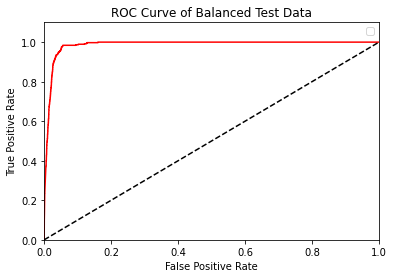

Out of Bag error of Balanced Test Data 0.055




In [15]:
y_pred = balance_random_forest.predict(X_test)             # predictions on training data

#Confusion Matrix
tn, fp, fn, tp = confusion_matrix(new_y_test, y_pred).ravel()
print('Confusion Matrix of Balanced Test Data:')
print(confusion_matrix(new_y_test, y_pred))
print('\n')

#Accuracy and Misclassification
test_Accuracy = balance_random_forest.score(X_test, new_y_test)
test_Accuracy = round(test_Accuracy, 4)
Misclassification = round(1 - train_Accuracy, 4)
print('Accuracy of Balanced Test Data:', test_Accuracy)
print('\n')
print('Misclassification of Balanced Test Data', Misclassification)
print('\n')

#AUC value
predict_proba = balance_random_forest.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(new_y_test, predict_proba)
test_AUC = roc_auc_score(new_y_test, predict_proba)
test_AUC = round(test_AUC, 4)
print('AUC of Balanced Test Data:', test_AUC)
print('\n')

#ROC Curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Balanced Test Data')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.legend()
plt.show()

#Out of Bag error
oob_error = round(1 - balance_random_forest.oob_score_, 4)
print('Out of Bag error of Balanced Test Data', oob_error)
print('\n')

(e)

In [3]:
import weka.core.jvm as jvm
import javabridge
jvm.start()

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['D:\\Python\\Lib\\site-packages\\javabridge\\jars\\rhino-1.7R4.jar', 'D:\\Python\\Lib\\site-packages\\javabridge\\jars\\runnablequeue.jar', 'D:\\Python\\Lib\\site-packages\\javabridge\\jars\\cpython.jar', 'D:\\Python\\lib\\site-packages\\weka\\lib\\python-weka-wrapper.jar', 'D:\\Python\\lib\\site-packages\\weka\\lib\\weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support disabled


In [4]:
#Combine train data and test data
train = X_train
train['class'] = y_train
test = X_test
test['class'] = y_test

#Give the path 
train_path = '../data/weka_train.csv'
test_path = '../data/weka_test.csv'

#Save in the csv file
train.to_csv(train_path, index = False)
test.to_csv(test_path, index = False)

In [5]:
from weka.core.converters import Loader

#Load data and specify the column of label
loader = Loader(classname = "weka.core.converters.CSVLoader")
weka_train = loader.load_file(train_path)
weka_test = loader.load_file(test_path)

#Get weka_train and weka_test for model
weka_train.class_is_last()
weka_test.class_is_last()

In [6]:
from weka.classifiers import Classifier, Evaluation
from weka.core.classes import Random

#Build the LMT classifier
LMT = Classifier(classname="weka.classifiers.trees.LMT", options=["-B"])
LMT.build_classifier(weka_train)

#Evaluate the train data with CV = 5
evl_train = Evaluation(weka_train)
evl_train.crossvalidate_model(LMT, weka_train, 5, Random(1))

Train Data:

Correctly Classified Instances       59494               99.1567 %
Incorrectly Classified Instances       506                0.8433 %
Kappa statistic                          0.7159
Mean absolute error                      0.0115
Root mean squared error                  0.084 
Relative absolute error                 34.9489 %
Root relative squared error             65.6286 %
Total Number of Instances            60000     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.997    0.349    0.994      0.997    0.996      0.720    0.940     0.995     neg
                 0.651    0.003    0.806      0.651    0.720      0.720    0.940     0.722     pos
Weighted Avg.    0.992    0.343    0.991      0.992    0.991      0.720    0.940     0.991     

Confusion Matrix for Train Data:
[[58843.   157.]
 [  349.   651.]]


MSE for Train Data: 0.084


AUC for Train Data: 0.9396


R

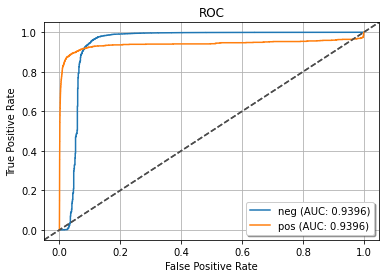

In [29]:
print('Train Data:')
print(evl_train.summary())
print(evl_train.class_details())

#Calculate confusion matrix
print('Confusion Matrix for Train Data:')
print(evl_train.confusion_matrix)
print('\n')

#Calculate MSE
train_MSE = evl_train.root_mean_squared_error
train_MSE = round(train_MSE, 4)
print('MSE for Train Data:', train_MSE)
print('\n')

#Calculate AUC value
LMT_AUC = evl_train.area_under_roc(1)
LMT_AUC = round(LMT_AUC, 4)
print("AUC for Train Data:", LMT_AUC)
print('\n')

#Draw ROC Curve
import weka.plot.classifiers as plcls
print("ROC Curve for Train Data")
plcls.plot_roc(evl_train, class_index=[0, 1], wait = True)

Test Data:

Correctly Classified Instances       15846               99.0375 %
Incorrectly Classified Instances       154                0.9625 %
Kappa statistic                          0.7713
Mean absolute error                      0.013 
Root mean squared error                  0.0887
Relative absolute error                 28.381  %
Root relative squared error             58.609  %
Total Number of Instances            16000     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.997    0.288    0.993      0.997    0.995      0.775    0.974     0.998     neg
                 0.712    0.003    0.853      0.712    0.776      0.775    0.974     0.803     pos
Weighted Avg.    0.990    0.281    0.990      0.990    0.990      0.775    0.974     0.993     

Confusion Matrix for Test Data:
[[15579.    46.]
 [  108.   267.]]


MSE for Test Data: 0.084


AUC for Test Data: 0.9737


ROC C

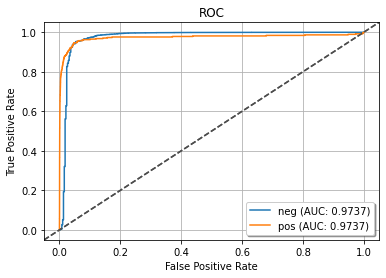

In [30]:
#Build to model to predict test set
evl_test = Evaluation(weka_test)
LMT_y_pred = evl_test.test_model(LMT, weka_test)

print('Test Data:')
print(evl_test.summary())
print(evl_test.class_details())

#Calculate confusion matrix
print('Confusion Matrix for Test Data:')
print(evl_test.confusion_matrix)
print('\n')

#Calculate MSE
test_MSE = evl_test.root_mean_squared_error
test_MSE = round(train_MSE, 3)
print('MSE for Test Data:', test_MSE)
print('\n')

#Calculate AUC value
LMT_AUC = evl_test.area_under_roc(1)
LMT_AUC = round(LMT_AUC, 4)
print("AUC for Test Data:", LMT_AUC)
print('\n')

#Draw ROC Curve
import weka.plot.classifiers as plcls
print("ROC Curve for Test Data")
plcls.plot_roc(evl_test, class_index=[0, 1], wait = True)

(f)

In [6]:
from imblearn.over_sampling import SMOTE

#Resample the train data
sm = SMOTE()
smote_X_train, smote_y_train = sm.fit_resample(X_train, y_train)
smote_train = pd.DataFrame(smote_X_train)
smote_train['class'] = smote_y_train

#Resample the test data
smote_X_test, smote_y_test = sm.fit_resample(X_test, y_test)
smote_test = pd.DataFrame(smote_X_test)
smote_test['class'] = smote_y_test

#Give the path 
train_path = '../data/smote_train.csv'
test_path = '../data/smote_test.csv'

#Save in the csv file
smote_train.to_csv(train_path, index = False)
smote_test.to_csv(test_path, index = False)
 
#Load data and specify the column of label
loader = Loader(classname = "weka.core.converters.CSVLoader")
smote_train = loader.load_file(train_path)
smote_test = loader.load_file(test_path)

#Get smote_train and smote_test for model
smote_train.class_is_last()
smote_test.class_is_last()

In [7]:
from weka.classifiers import Classifier, Evaluation
from weka.core.classes import Random

#Build the LMT classifier on TRAIN DATA after SMOTE
smote = Classifier(classname="weka.classifiers.trees.LMT", options=["-B"])
smote.build_classifier(smote_train)

#Evaluate the train data with CV = 5
evl_train = Evaluation(smote_train)
evl_train.crossvalidate_model(smote, smote_train, 5, Random(1))


Correctly Classified Instances      116564               98.7831 %
Incorrectly Classified Instances      1436                1.2169 %
Kappa statistic                          0.9757
Mean absolute error                      0.0187
Root mean squared error                  0.1013
Relative absolute error                  3.7301 %
Root relative squared error             20.262  %
Total Number of Instances           118000     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.987    0.012    0.988      0.987    0.988      0.976    0.996     0.996     neg
                 0.988    0.013    0.987      0.988    0.988      0.976    0.996     0.994     pos
Weighted Avg.    0.988    0.012    0.988      0.988    0.988      0.976    0.996     0.995     

Confusion Matrix for Train Data:
[[58254.   746.]
 [  690. 58310.]]


MSE for Train Data: 0.1013


AUC for Train Data: 0.9963


ROC Curve fo

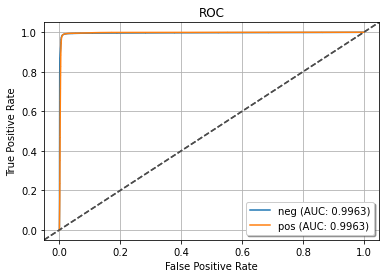

In [10]:
print(evl_train.summary())
print(evl_train.class_details())

#Calculate confusion matrix
print('Confusion Matrix for Train Data:')
print(evl_train.confusion_matrix)
print('\n')

#Calculate MSE
train_MSE = evl_train.root_mean_squared_error
train_MSE = round(train_MSE, 4)
print('MSE for Train Data:', train_MSE)
print('\n')

#Calculate AUC value
LMT_AUC = evl_train.area_under_roc(1)
LMT_AUC = round(LMT_AUC, 4)
print("AUC for Train Data:", LMT_AUC)
print('\n')

#Draw ROC Curve
import weka.plot.classifiers as plcls
print("ROC Curve for Train Data")
plcls.plot_roc(evl_train, class_index=[0, 1], wait = True)


Correctly Classified Instances       30074               96.2368 %
Incorrectly Classified Instances      1176                3.7632 %
Kappa statistic                          0.9247
Mean absolute error                      0.0491
Root mean squared error                  0.1832
Relative absolute error                  9.812  %
Root relative squared error             36.6495 %
Total Number of Instances            31250     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.976    0.051    0.950      0.976    0.963      0.925    0.967     0.928     neg
                 0.949    0.024    0.976      0.949    0.962      0.925    0.967     0.961     pos
Weighted Avg.    0.962    0.038    0.963      0.962    0.962      0.925    0.967     0.945     

Confusion Matrix for Test Data:
[[15253.   372.]
 [  804. 14821.]]


MSE for Test Data: 0.101


AUC for Test Data: 0.967


ROC Curve for Tes

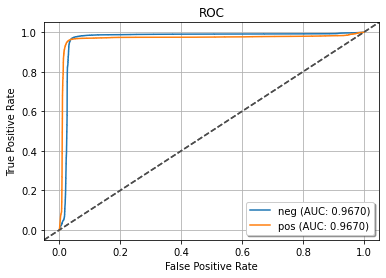

In [11]:
#Build to model to predict test set
evl_test = Evaluation(smote_test)
smote_y_pred = evl_test.test_model(smote, smote_test)

print(evl_test.summary())
print(evl_test.class_details())

#Calculate confusion matrix
print('Confusion Matrix for Test Data:')
print(evl_test.confusion_matrix)
print('\n')

#Calculate MSE
test_MSE = evl_test.root_mean_squared_error
test_MSE = round(train_MSE, 3)
print('MSE for Test Data:', test_MSE)
print('\n')

#Calculate AUC value
LMT_AUC = evl_test.area_under_roc(1)
LMT_AUC = round(LMT_AUC, 4)
print("AUC for Test Data:", LMT_AUC)
print('\n')

#Draw ROC Curve
print("ROC Curve for Test Data")
plcls.plot_roc(evl_test, class_index=[0, 1], wait = True)

In [7]:
jvm.stop()